## Flight Price Prediction


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the fare of the flight is affected by other variables such as source,destination,no of stops,dep_time,Arrival_time and date of travel.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh


### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
train_df = pd.read_excel('data/Data_train.xlsx')

#### Show Top 5 Records

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Shape of the dataset

In [4]:
train_df.shape

(10683, 11)

### 3. Data Checks to perform

- Check Missing values
- Check data type
- Check the number of unique values of each column
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#Dropping the records with missing values

train_df.dropna(inplace=True)

In [7]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### 3.3 Check data types

In [8]:
# Check Null and Dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
train_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### 3.7 Exploratory Data Analysis & Visualization

In [10]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
print("Categories in 'Airline' variable:     ",end=" " )
print(train_df['Airline'].unique())

print("\nCategories in 'Source' variable:  ",end=" ")
print(train_df['Source'].unique())

print("\nCategories in'Destination' variable:  ",end=" " )
print(train_df['Destination'].unique())

print("\nCategories in 'Total_Stops' variable:     ",end=" " )
print(train_df['Total_Stops'].unique())

print("\nCategories in 'Additional_Info' variable:     ",end=" " )
print(train_df['Additional_Info'].unique())

Categories in 'Airline' variable:      ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Categories in 'Source' variable:   ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Categories in'Destination' variable:   ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

Categories in 'Total_Stops' variable:      ['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']

Categories in 'Additional_Info' variable:      ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in train_df.columns if train_df[feature].dtype != 'O']
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['Price']

We have 10 categorical features : ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [14]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Text(0, 0.5, 'Count of Airlines')

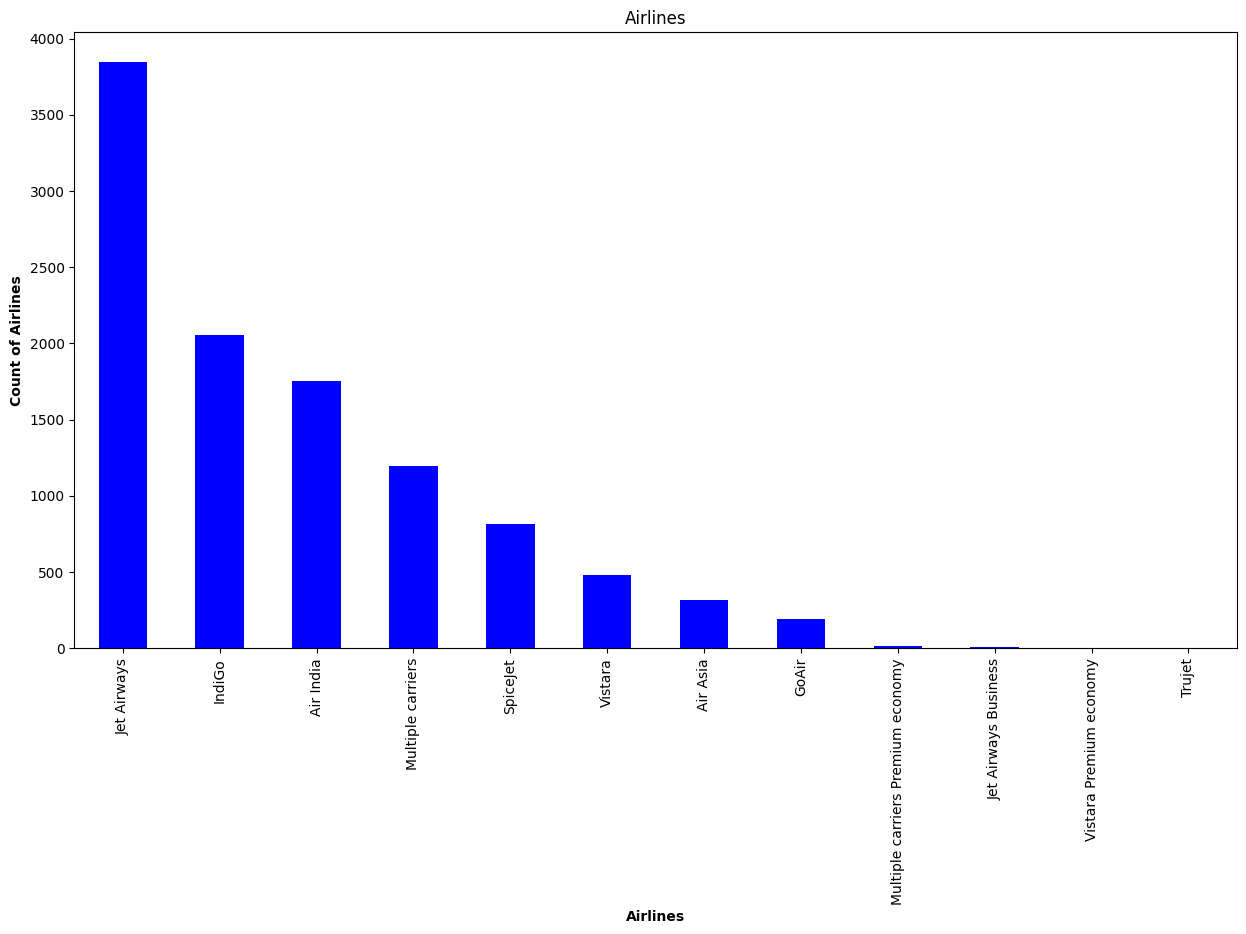

In [15]:
# Visualizing the most preferred Airline

plt.rcParams['figure.figsize'] = [15,8]

train_df['Airline'].value_counts().plot(kind='bar',stacked=True, color='blue')
plt.title('Airlines')
plt.xlabel("Airlines",fontweight = 'bold')
plt.ylabel("Count of Airlines",fontweight = 'bold')

#### Insights:
* People mostly prefer Jet Airways for travel
* Indogo and Air India come in the second and third preference


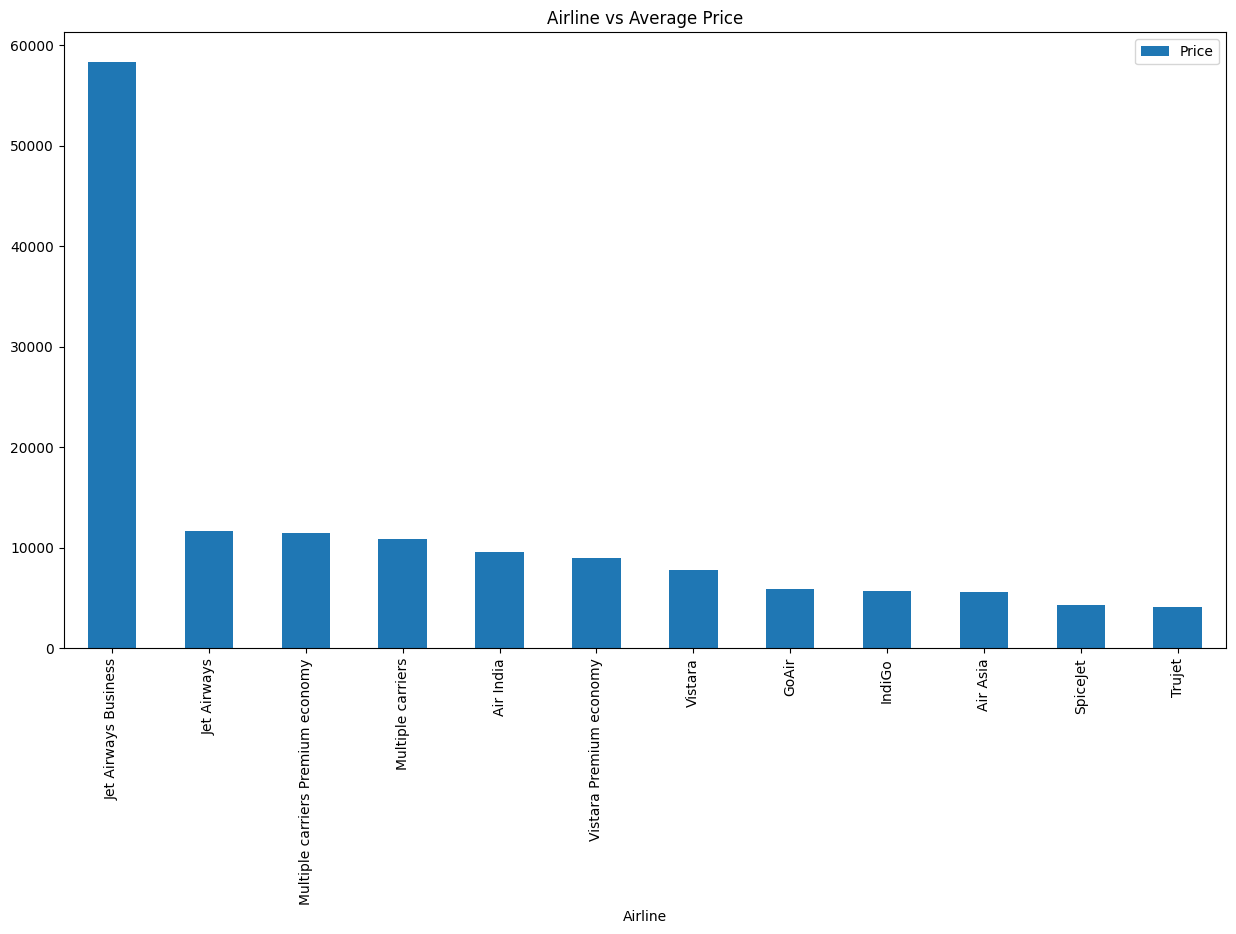

In [16]:
# Most expensive Airline

plt.rcParams['figure.figsize'] = [15,8]
ax = pd.DataFrame(train_df.groupby(['Airline'])['Price'].mean().sort_values(ascending = False))
ax.plot.bar()
plt.title('Airline vs Average Price')
plt.show()

#### Insights:
* Jet Airways Business is the most expensive flight
* Most of the other flights' price are mostly on the same range ,only little difference in the price range
* Truejet and Spicejet are the cheapest flights

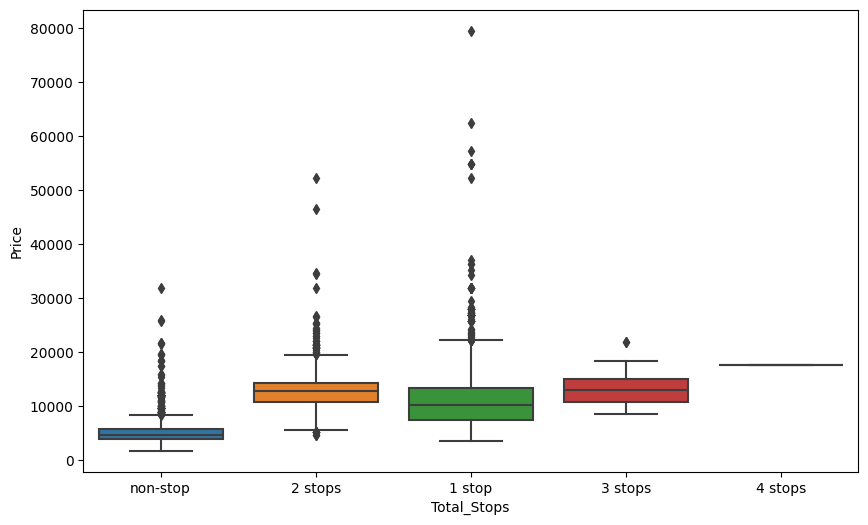

In [17]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Total_Stops', y = 'Price', data = train_df)
plt.show()

#### Insights:
* Price has a linear relationship with the total number of stops